In [209]:
#importing all Library
import pandas as pd
pd.set_option('display.max_columns', 40)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [72]:
data = pd.read_csv(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\FlipRobo\Micro Credit Project\Data file.csv")
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

#### Dropping Unnamed column that may be the index

In [73]:
data.drop('Unnamed: 0',inplace=True,axis=1)

In [74]:
data.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [75]:
data.isnull().mean()

label                   0.0
msisdn                  0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle                 0.0
pdate               

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [77]:
from collections import Counter
Counter(data.label)

Counter({0: 26162, 1: 183431})

#### As the data set is imbalance and more bias to label as 1, so we have to fix this later

In [78]:
data.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

#### from the above statistical analysis it is clearly see that there is difference between the 75th percentile and max so this is an indication of the outliers in the dataset

# EDA 

In [79]:
data.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [80]:
#### Checking numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numerical feature' , len(numerical_feature))
data[numerical_feature].head()

numerical feature 33


label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [81]:
#checking the non numerical features
non_numerical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('non numerical feature' , len(non_numerical_feature))
data[non_numerical_feature].head()

non numerical feature 3


msisdn pcircle       pdate
0  21408I70789     UPW  2016-07-20
1  76462I70374     UPW  2016-08-10
2  17943I70372     UPW  2016-08-19
3  55773I70781     UPW  2016-06-06
4  03813I82730     UPW  2016-06-22

In [82]:
# checkinng the discreate numerical features
discrete_numerical_features = [feature for feature in numerical_feature if len(data[feature].unique())<10]
print('discrete variable count', len(discrete_numerical_features))
data[discrete_numerical_features].head()

discrete variable count 4


label  medianamnt_loans30  maxamnt_loans90  medianamnt_loans90
0      0                 0.0                6                 0.0
1      1                 0.0               12                 0.0
2      1                 0.0                6                 0.0
3      1                 0.0                6                 0.0
4      1                 0.0                6                 0.0

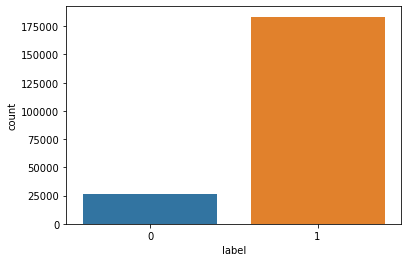

In [83]:
sns.countplot(x='label',data=data)

#### Most of the lablel is bias with label = 1

In [84]:
# assign the numerical features to one dataframe variable
numerical_feature = data[numerical_feature]

In [85]:
numerical_feature.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [86]:
# Extract month and year from the date column
data["month"] = pd.to_datetime(data["pdate"], format = "%Y/%m/%d").dt.month

In [87]:
data.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  month  
0                 0.0  29.000000  29.000000     UPW  2016-07-20      7  
1                 0.0   0.000000   0.000000     UPW  2016-08-10      8  
2                 0.0   0.000000   0.000000     UPW  2016-08-19      8  
3                 0.0   0.000000   0.000000     UPW  2016-06-06      6  
4                 0.0   2.333333   2.333333     UPW  2016-06-22      6

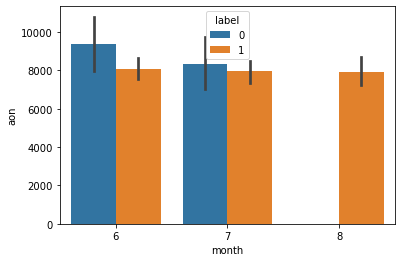

In [88]:
sns.barplot(x='month',y='aon',hue='label',data=data)

#### 1. From the abpve graph we can clearly see that there are no defaulter in 8th month i.e. August month of 2016 year
#### 2. In june month there are more defaulter as compared to non defaulter and their age on cellular network is also more 

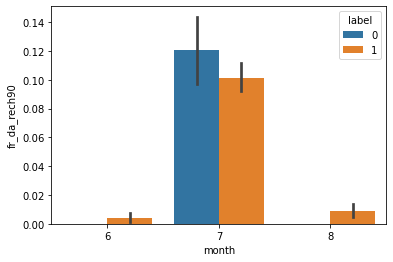

In [89]:
sns.barplot(x='month',y='fr_da_rech90',hue='label',data=data)

#### - Frequency of data account recharged in last 90 days is more in month july and least in june
#### - Also in july month data account recharge in those account which are defaulter

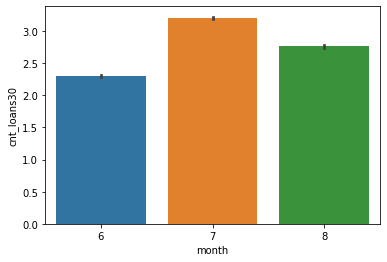

In [90]:
sns.barplot(x='month',y='cnt_loans30',data=data)

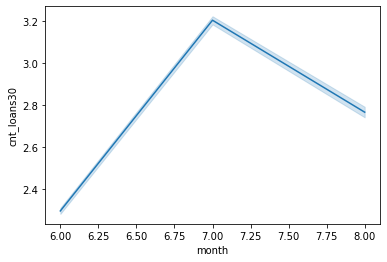

In [91]:
sns.lineplot(x='month',y='cnt_loans30',data=data)

#### Most of the users are taken loan in the month of july and decrease in august month and max count of loan is 1 and 2

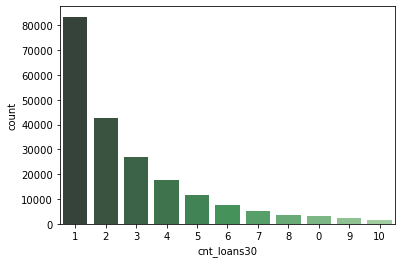

In [92]:
sns.countplot(x='cnt_loans30',data=data,order=data.cnt_loans30.value_counts().iloc[:11].index,palette="Greens_d")

#### In the above countplot most of the user take loan 1,2 and 3 time , these cover 90% of the total data

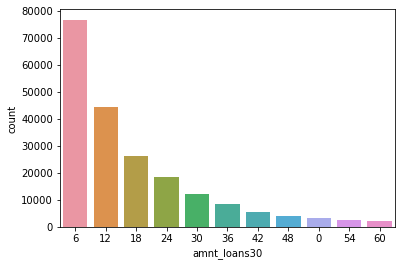

In [93]:
sns.countplot(x='amnt_loans30',order=data.amnt_loans30.value_counts().iloc[:11].index,data=data)

#### These are the total loan amount that user had mostly are 6,12,15,24

### Removing Columns:
    - Removing unwanted column like msisdn number which does not play any imp role because that is unique
    - Removing telecom circle and date column which is also not a imp features, because telecom circle is same for all
   

In [94]:
data.drop(['msisdn','pcircle','pdate'],axis=1,inplace=True)

In [95]:
data.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  month  
0                 0.0  29.000000  29.000000      7  
1                 0.0   0.000000   0.000000      8  
2                 0.0   0.000000   0.000000      8  
3                 0.0   0.000000   0.000000      6  
4                 0.0   2.333333   2.333333      6

# Feature Engineering

### check all the column min value and  replacing  the negative value with zero 
    - Because in this data set there are negative values which are from the total amount, age which cant be negative.

In [102]:
for features in data.columns:
    if(data[features].min()<0):
        print(features)

aon
daily_decr30
daily_decr90
rental30
rental90
last_rech_date_ma
last_rech_date_da
medianmarechprebal30
medianmarechprebal90


In [104]:
for col in data.columns:
    data[col][data[col] < 0] = 0

### As all the features are numerical and continous, so time to check whether the features are normally distributed or not using QQ plot

In [106]:
import scipy.stats as stat
import pylab

In [107]:
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

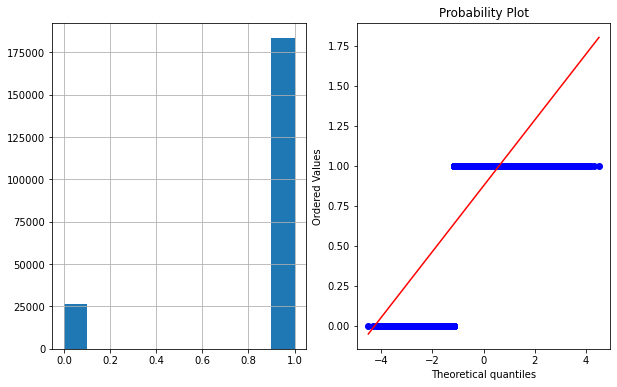

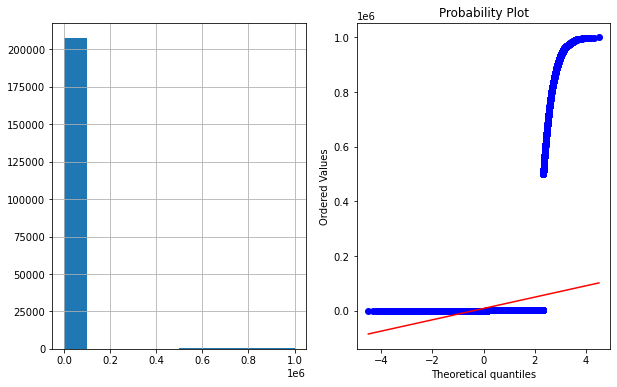

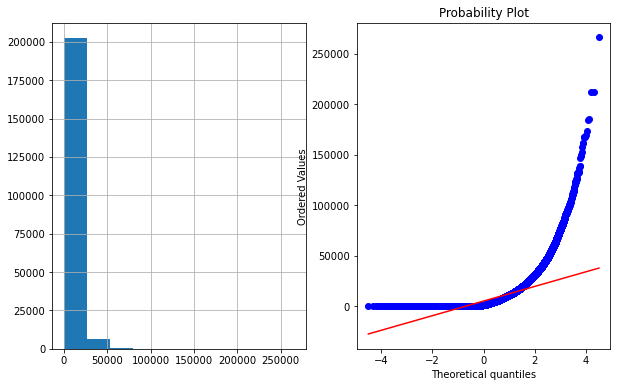

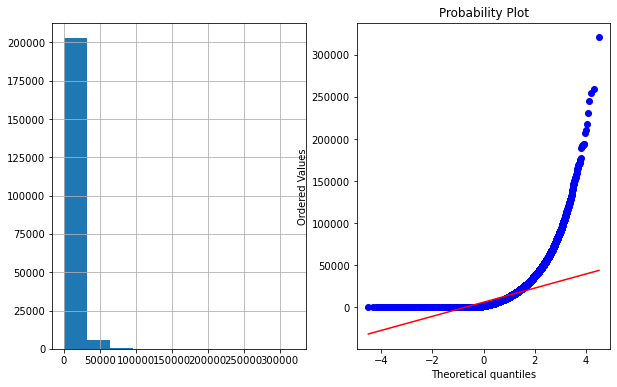

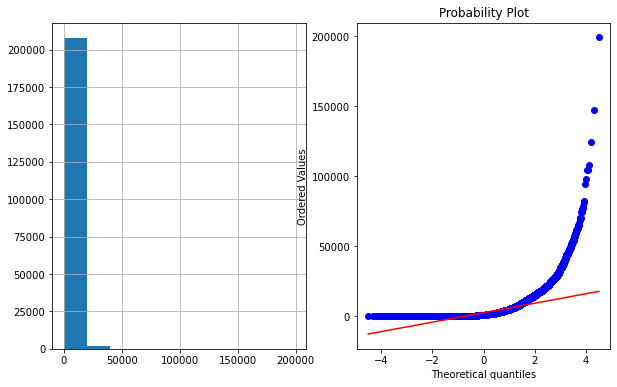

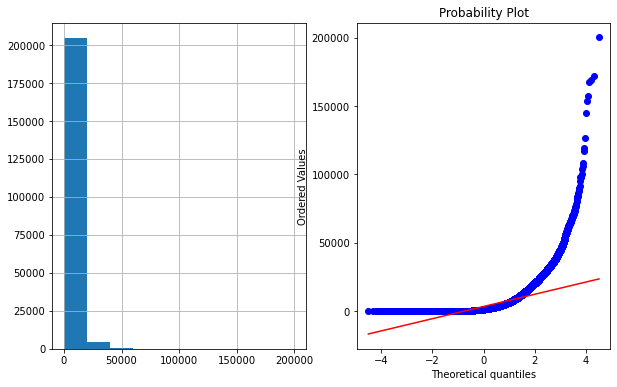

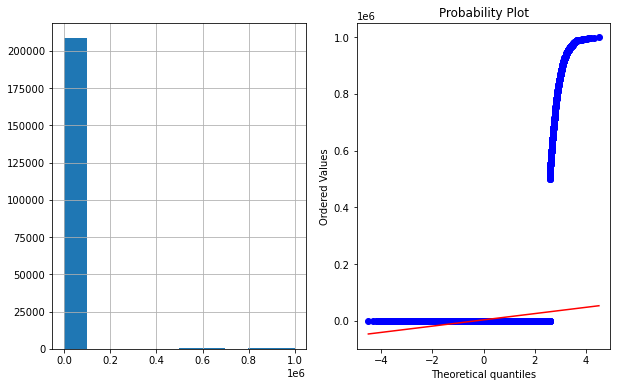

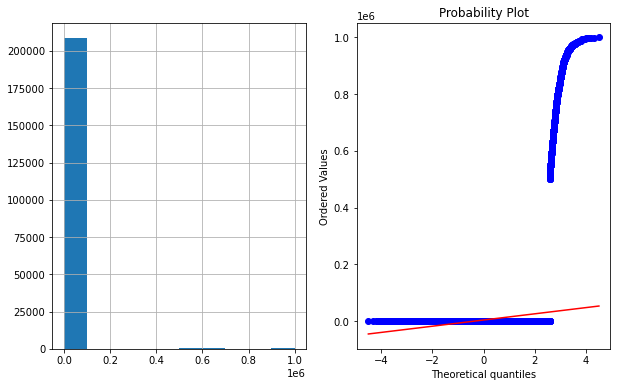

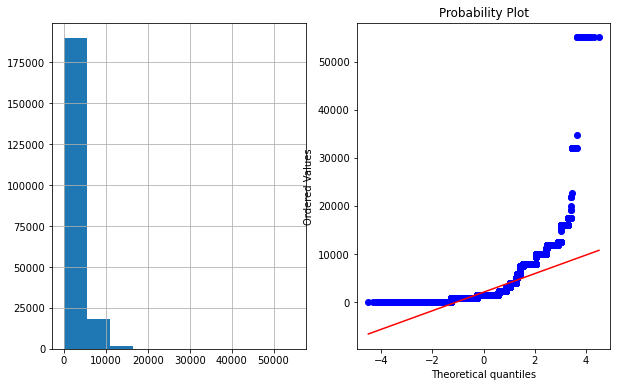

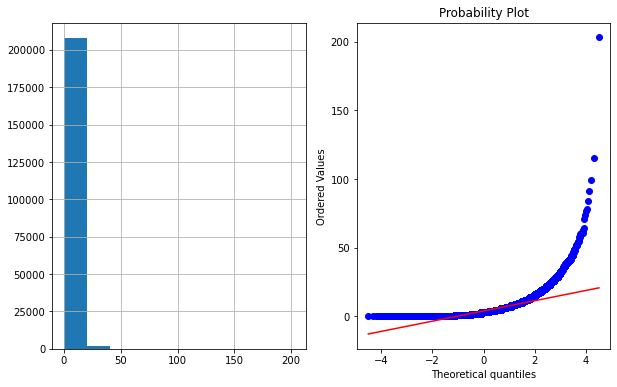

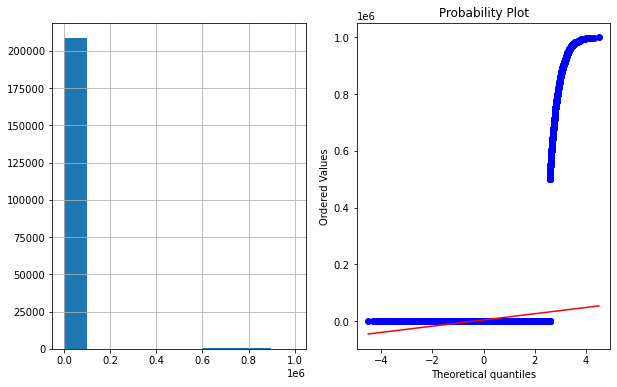

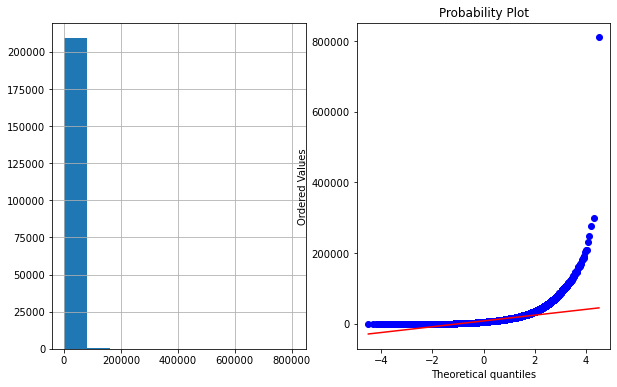

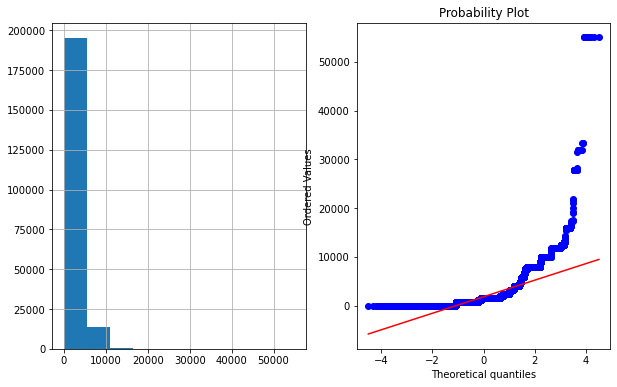

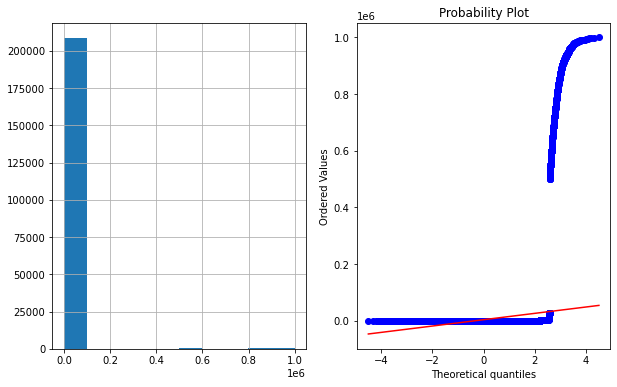

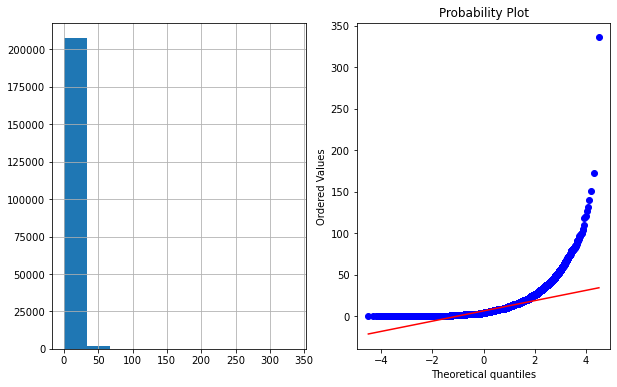

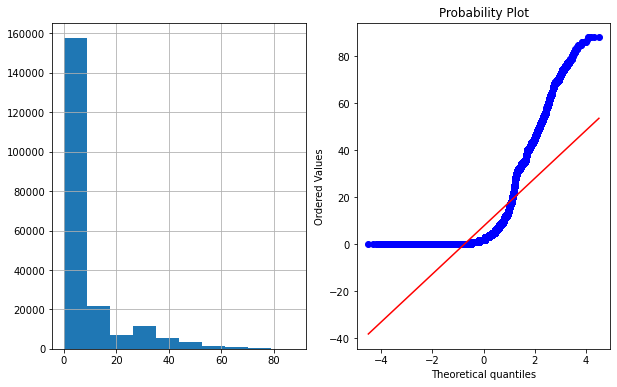

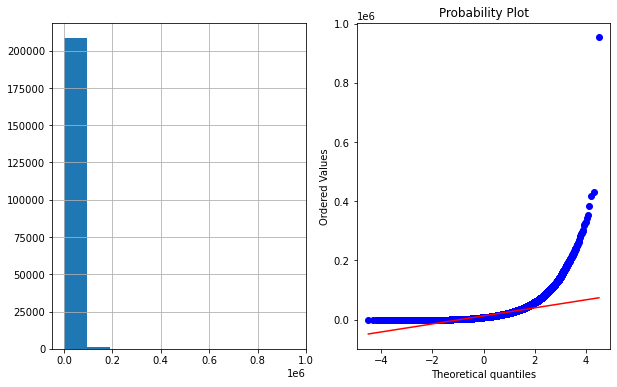

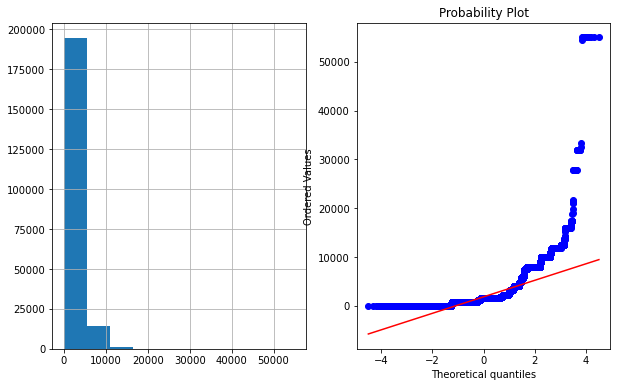

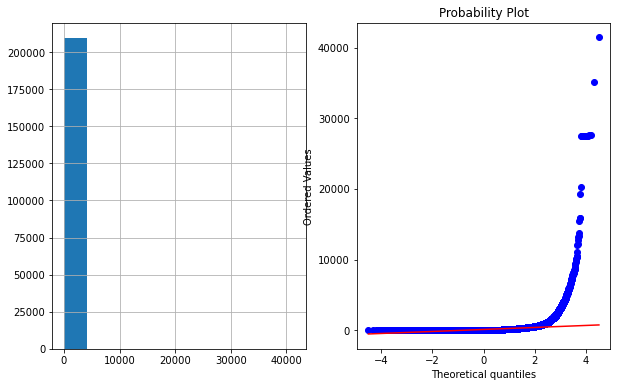

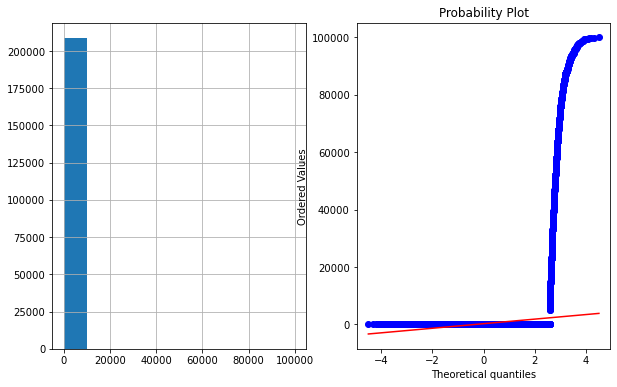

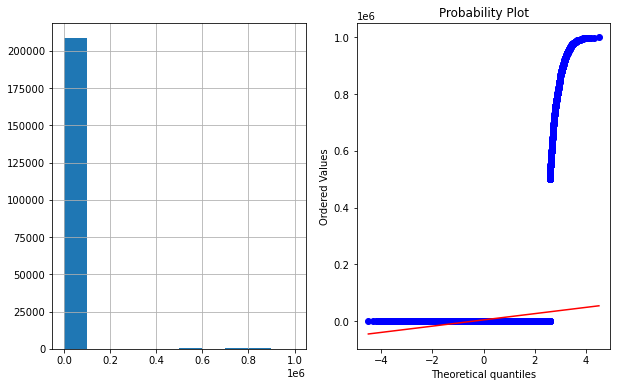

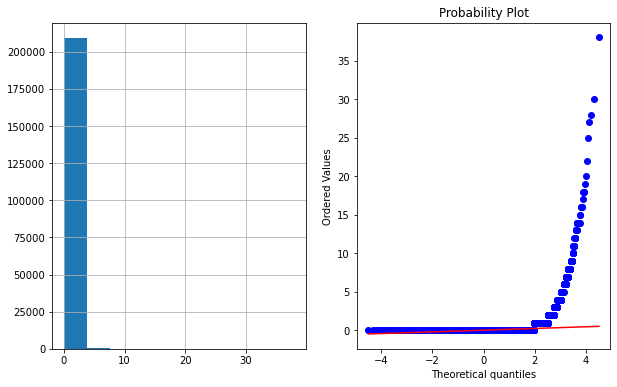

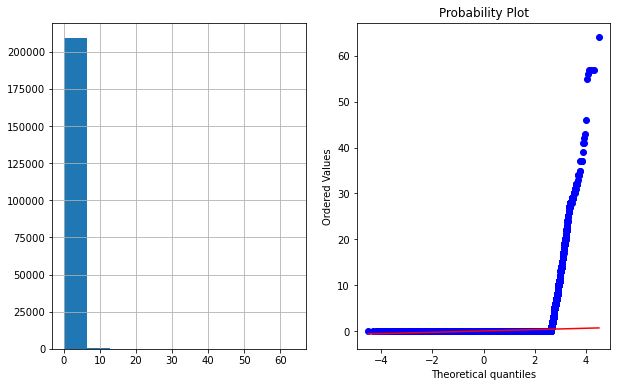

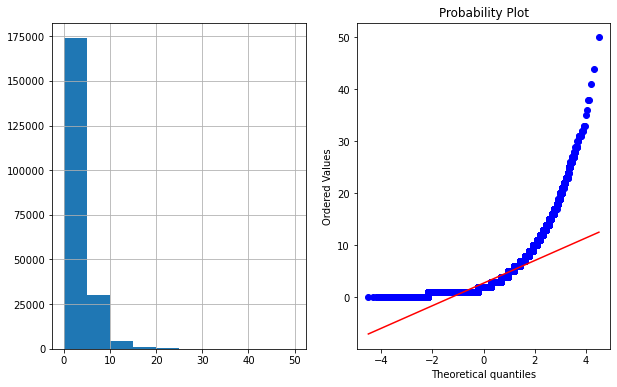

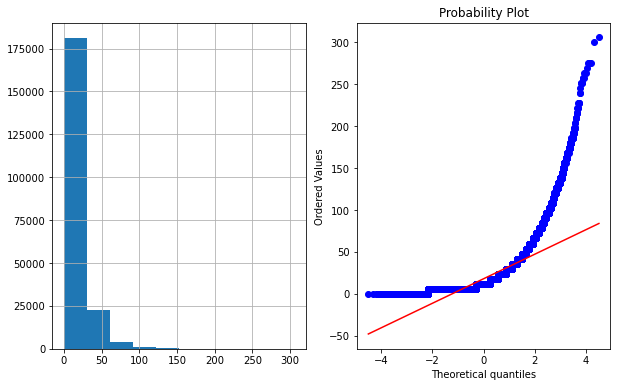

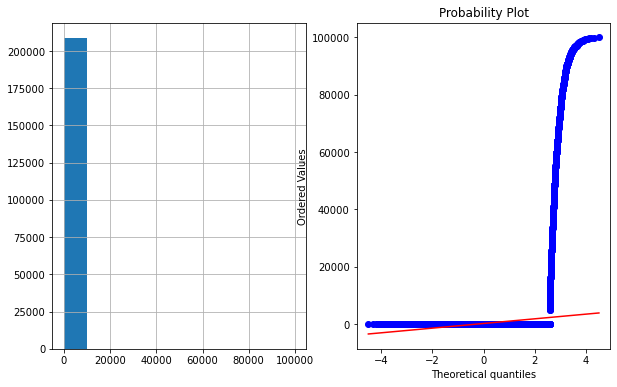

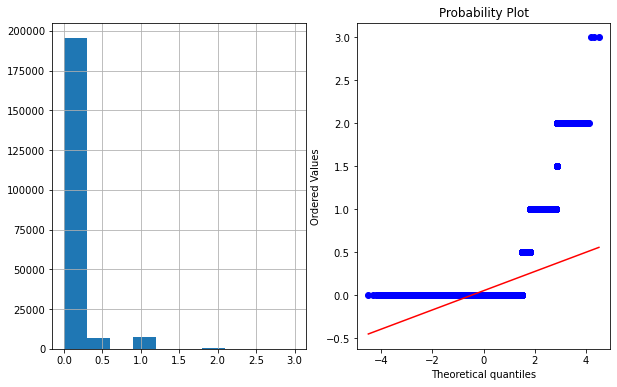

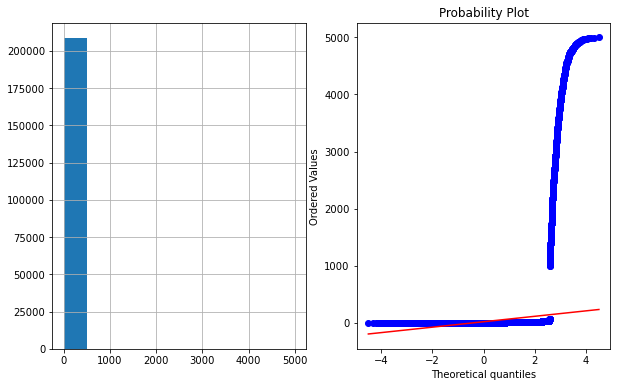

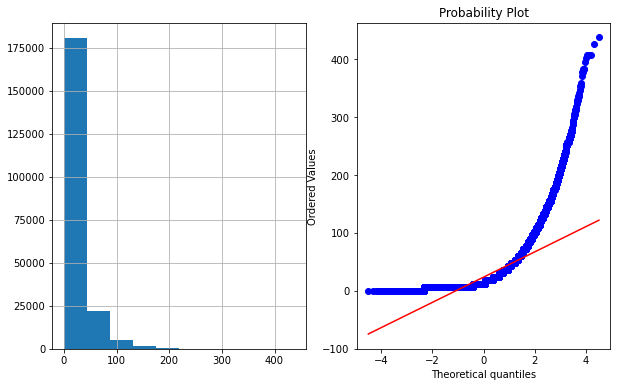

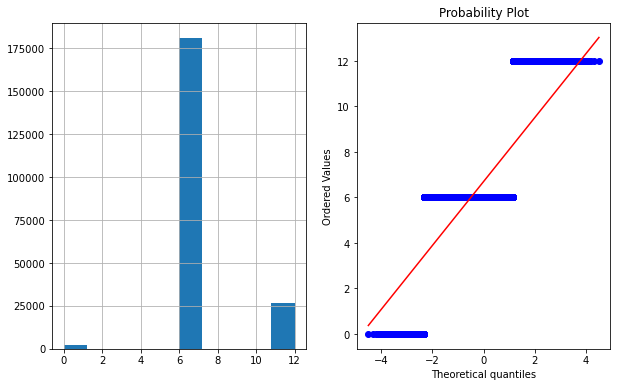

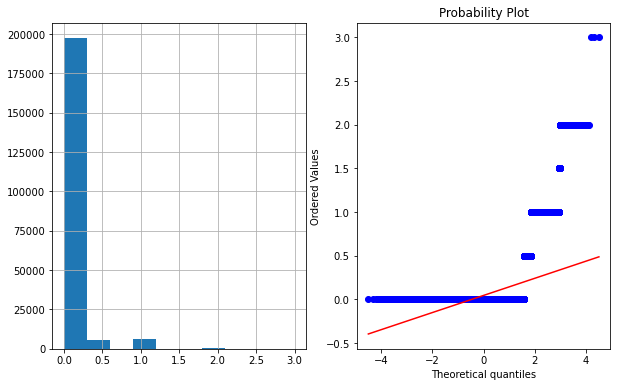

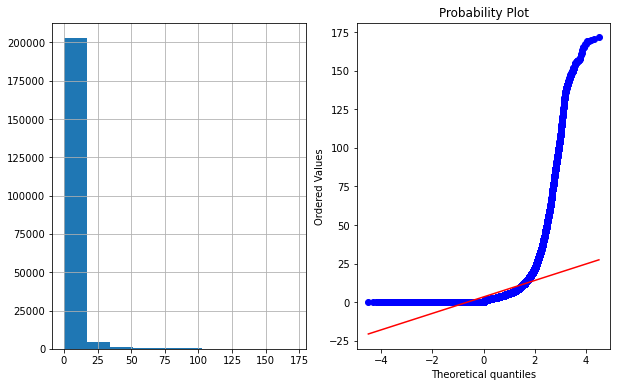

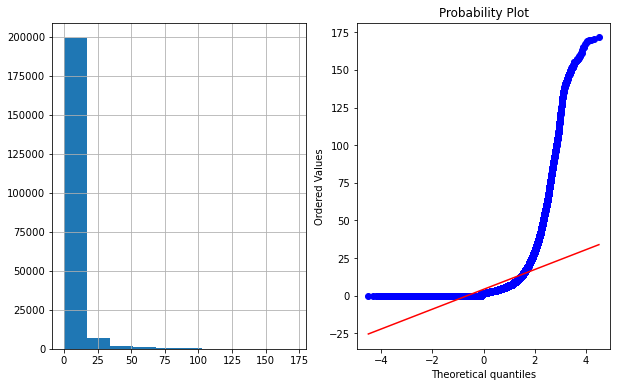

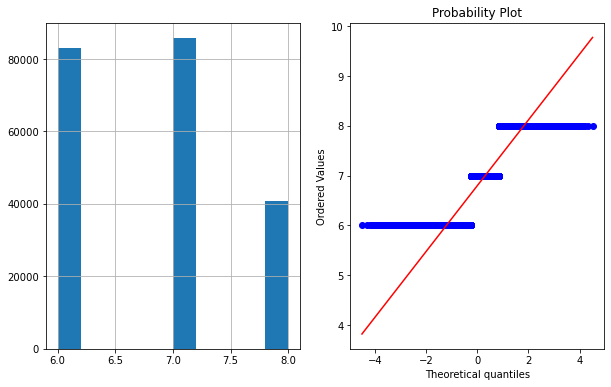

In [108]:
for features in data.columns:
    plot_data(data,features)

### From the above QQ plot we can clearly see that all the features are left skewed and not normally distributed.

# Outliers

In [109]:
data.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.576081    5381.416791    6082.529604   
std         0.330519   75696.057541    9220.614929   10918.804663   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2703.979234    3496.451841        3755.986822        3712.203861   
std      4299.241981    5760.545289       53905.882512       53374.833364   
min         0.000000       0.000000           0.000000           0.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3853.073481        6.31543   
std             2070.864620          54006.291018        7.19347   
min                0.000000              0.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              93.230928     262.578110    3749.494447       0.041495   
std              368.652343    4183.897978   53885.414979       0.397556   
min                0.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

#### There are many outliers in the dataset, so I will remove them from those column which will not effect the data loss

#### Features that contain outliers which mislead the data and value count is also very less:
- aon
- last_rech_date_ma
- last_rech_date_da
- fr_ma_rech30
- medianmarechprebal30
- sumamnt_ma_rech90
- cnt_da_rech30
- fr_da_rech30
- medianmarechprebal90
- maxamnt_loans30
- cnt_loans90


#### Replacing the outliers with IQR after third deviation

In [145]:
outliers_column = ['aon','last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','sumamnt_ma_rech90','cnt_da_rech30','fr_da_rech30','medianmarechprebal90','maxamnt_loans30','cnt_loans90']

In [153]:
for features in outliers_column:
    IQR = data[features].quantile(0.75) - data[features].quantile(0.25)
    upper_bridge=data[features].quantile(0.75)+(IQR*3)
    print("Upper Bridge value : ")
    print(features+" : ",upper_bridge)
    print("\n")

Upper Bridge value : 
aon :  3190.0


Upper Bridge value : 
last_rech_date_ma :  25.0


Upper Bridge value : 
last_rech_date_da :  0.0


Upper Bridge value : 
fr_ma_rech30 :  24.0


Upper Bridge value : 
medianmarechprebal30 :  299.0


Upper Bridge value : 
sumamnt_ma_rech90 :  57049.0


Upper Bridge value : 
cnt_da_rech30 :  0.0


Upper Bridge value : 
fr_da_rech30 :  0.0


Upper Bridge value : 
medianmarechprebal90 :  273.4400000000005


Upper Bridge value : 
maxamnt_loans30 :  6.0


Upper Bridge value : 
cnt_loans90 :  17.0




In [158]:
df = data.copy()

In [159]:
for features in outliers_column:
    df.loc[df[features]>=upper_bridge,features]=upper_bridge

# Feature Selection

#### Now by plotting the heatmap I am checking the correaltion of all features

[]

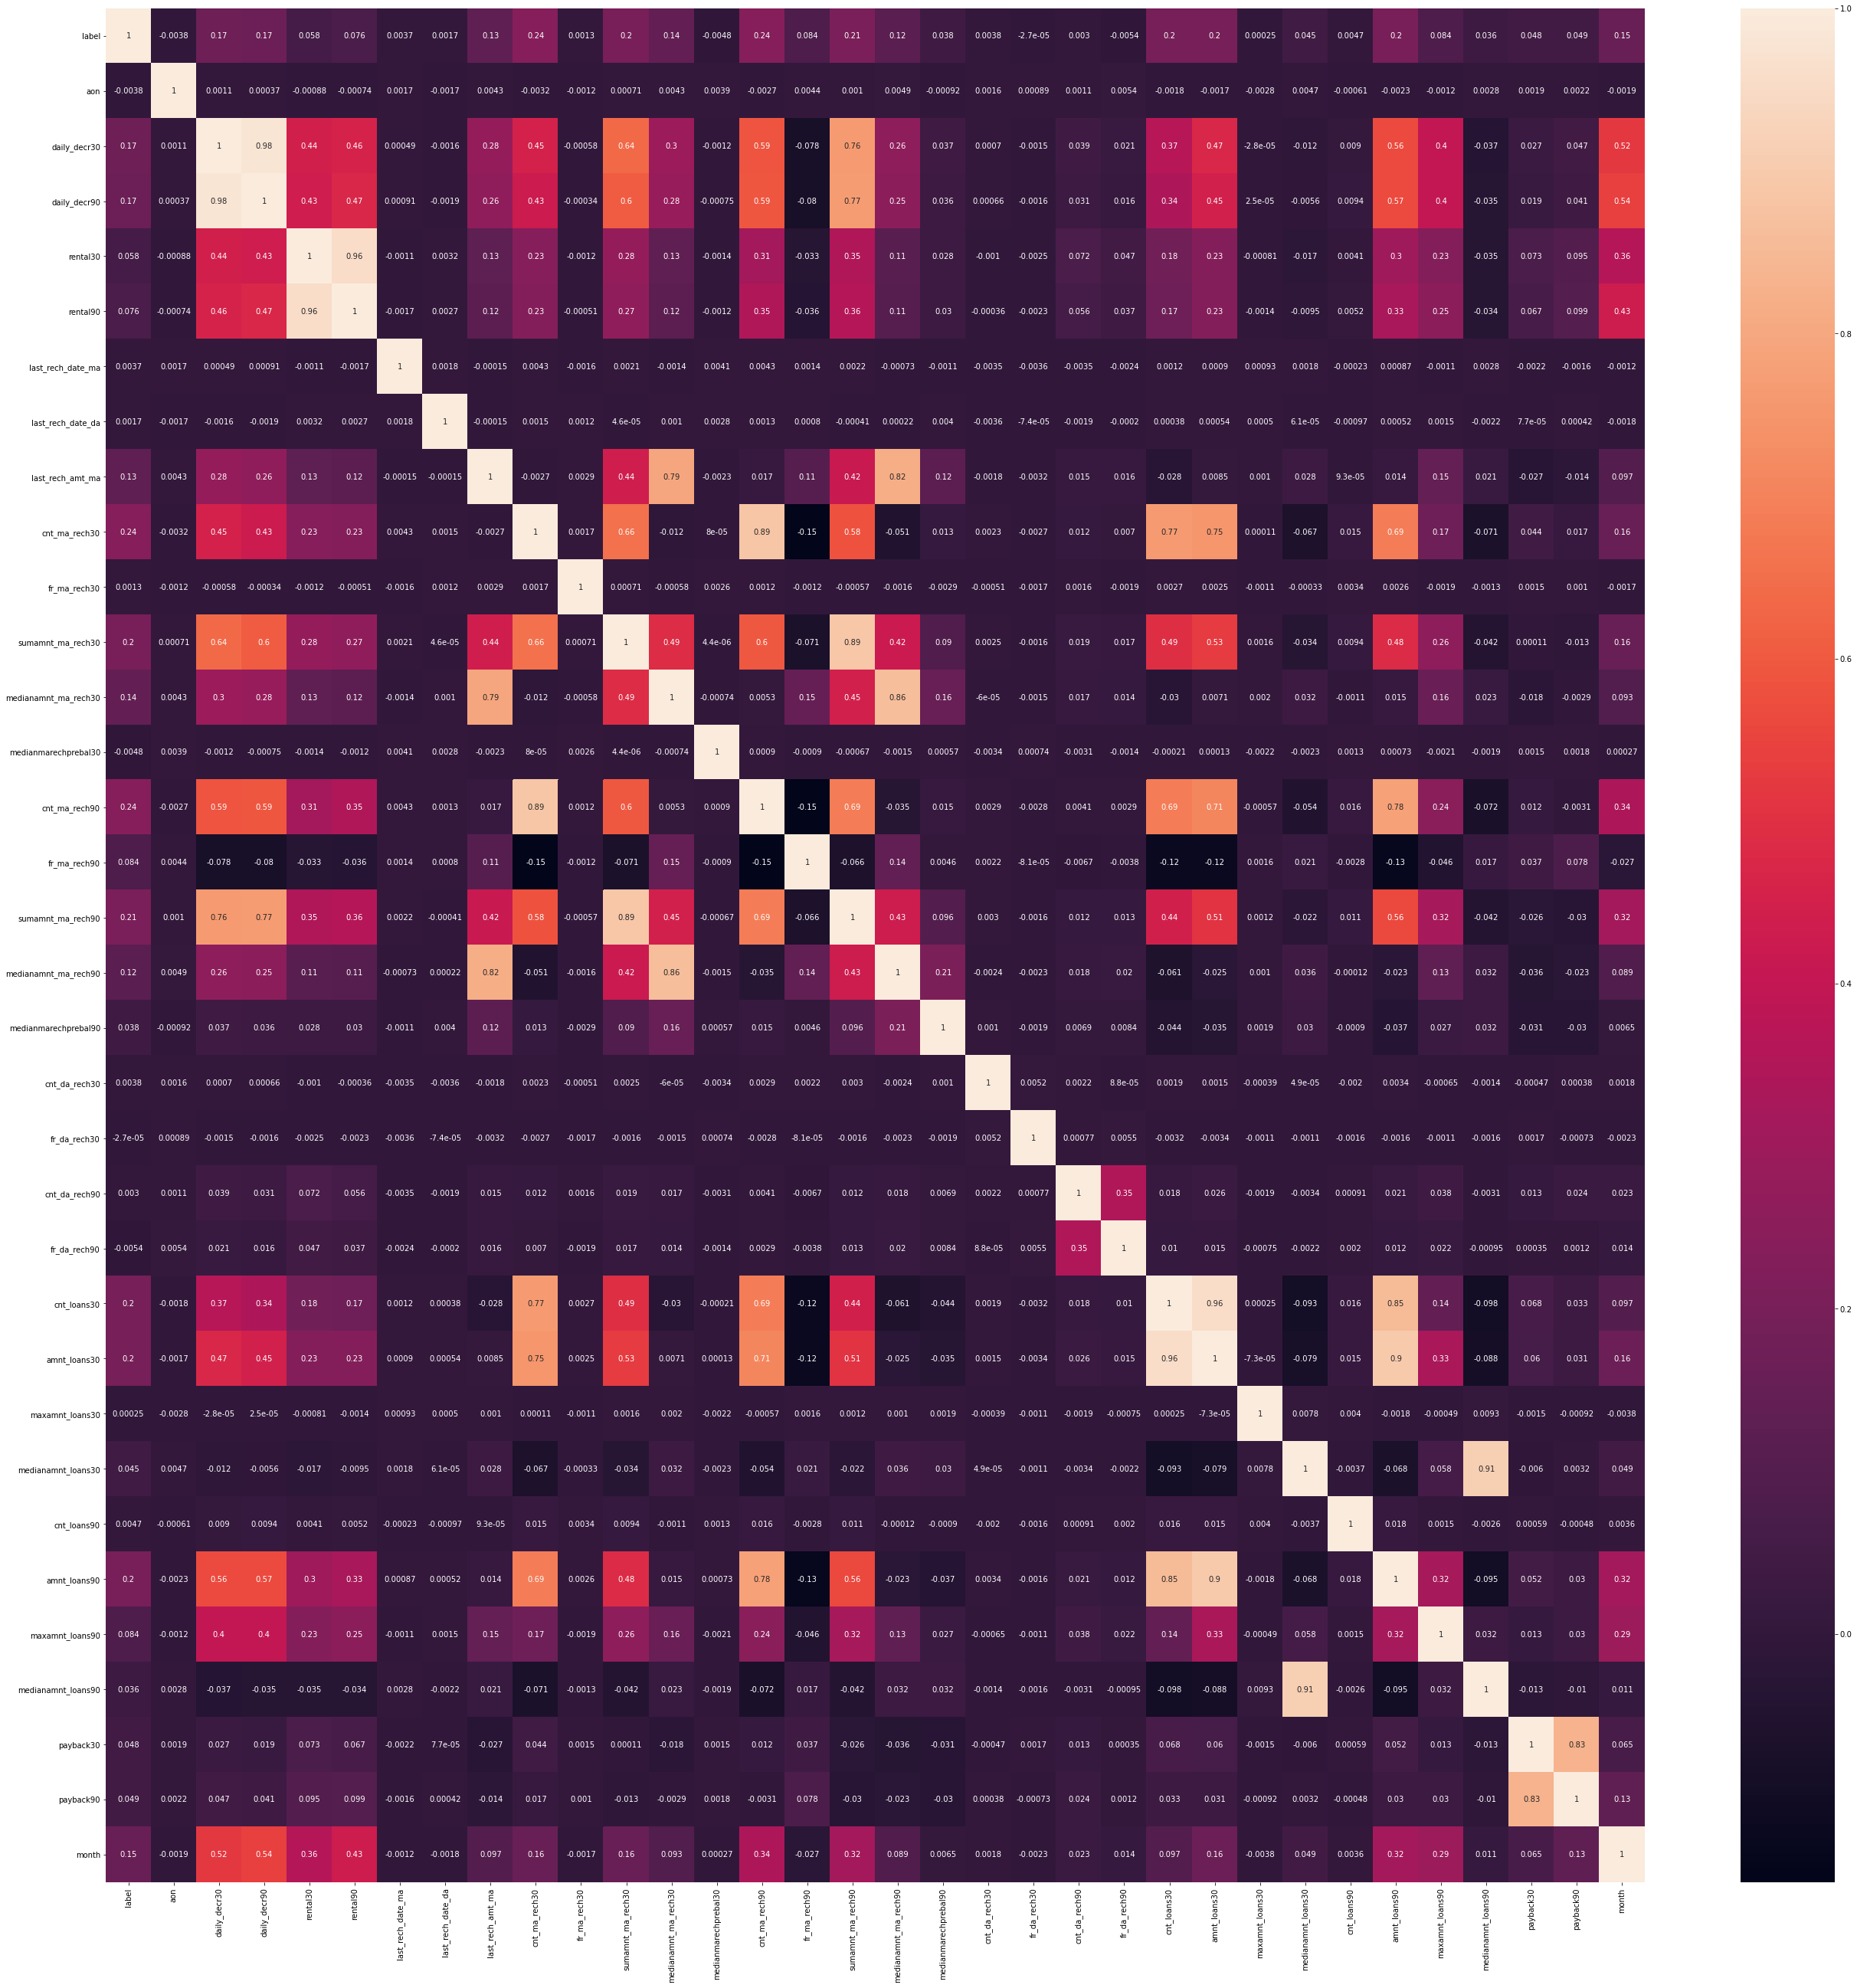

In [170]:
plt.figure(figsize=(45,45))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [177]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [180]:
corr_features = correlation(df, 0.81)
len(set(corr_features))

11

In [181]:
#### From the above graph there are several features which have positive correlation more then 80% that are:

#### So removing these features from the dataset    
corr_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans90',
 'cnt_ma_rech90',
 'daily_decr90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'payback90',
 'rental90'}

In [182]:
df.drop(corr_features,axis=1,inplace=True)

In [183]:
df.shape

(209593, 23)

# Feature Scaling using Standard Scaler

In [185]:
#assign the value of x and y for training and testing phase
x = df.drop(columns=['label'])
y = df[["label"]]
print(x.shape)
print(y.shape)

(209593, 22)
(209593, 1)


In [186]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [187]:
df_scaled.head()

aon  daily_decr30  rental30  last_rech_date_ma  last_rech_date_da  \
0  0.088984     -0.252301 -0.577743          -0.573174          -0.176127   
1  0.088984      0.731036  0.229641           2.315367          -0.176127   
2  0.088984     -0.432013 -0.419575          -0.380605          -0.176127   
3  0.088984     -0.581328 -0.591864           2.315367          -0.176127   
4  0.088984     -0.567295 -0.373341          -0.188035          -0.176127   

   last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0         -0.221637      -0.464760      2.715457          -0.456281   
1          1.570178      -0.699718     -0.774754          -0.189110   
2         -0.221637      -0.699718     -0.774754          -0.608062   
3         -0.471344      -0.934677     -0.774754          -0.759843   
4          0.103151       0.710030     -0.364141           1.215482   

   medianamnt_ma_rech30  medianmarechprebal30  fr_ma_rech90  \
0             -0.132224             -0.835667      1.055043   
1              1.919098              0.594551     -0.612919   
2             -0.132224              0.594551     -0.612919   
3             -0.875394             -1.964787     -0.612919   
4              0.239602              0.594551     -0.454065   

   sumamnt_ma_rech90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0           0.333251      -0.088003      -0.08066      -0.104375   
1           0.333251      -0.088003      -0.08066      -0.104375   
2           0.333251      -0.088003      -0.08066      -0.104375   
3           0.333251      -0.088003      -0.08066      -0.104375   
4           0.333251      -0.088003      -0.08066      -0.104375   

   fr_da_rech90  cnt_loans30  maxamnt_loans30  medianamnt_loans30  payback30  \
0     -0.048048    -0.297116        -0.312865           -0.247794    2.90470   
1     -0.048048    -0.688582         2.332911           -0.247794   -0.38563   
2     -0.048048    -0.688582        -0.312865           -0.247794   -0.38563   
3     -0.048048    -0.297116        -0.312865           -0.247794   -0.38563   
4     -0.048048     1.660218        -0.312865           -0.247794   -0.12089   

      month  
0  0.273360  
1  1.622099  
2  1.622099  
3 -1.075378  
4 -1.075378

# Model Creation and using Logistic

In [191]:
train_x,test_x,train_y,test_y = train_test_split(df_scaled,y,test_size = 0.20)
LG = LogisticRegression()
LG.fit(train_x,train_y)
pred = LG.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(classification_report(test_y,pred))
print(confusion_matrix(test_y,pred))

Accuracy Score: 87.54979842076386
              precision    recall  f1-score   support

           0       0.55      0.05      0.10      5270
           1       0.88      0.99      0.93     36649

    accuracy                           0.88     41919
   macro avg       0.71      0.52      0.51     41919
weighted avg       0.84      0.88      0.83     41919

[[  278  4992]
 [  227 36422]]


# KNN

In [192]:
train_x,test_x,train_y,test_y = train_test_split(df_scaled,y,test_size = 0.20)
KN = KNeighborsClassifier()
KN.fit(train_x,train_y)
pred = KN.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


Accuracy Score: 89.53934969822754
[[ 2278  2943]
 [ 1442 35256]]
              precision    recall  f1-score   support

           0       0.61      0.44      0.51      5221
           1       0.92      0.96      0.94     36698

    accuracy                           0.90     41919
   macro avg       0.77      0.70      0.73     41919
weighted avg       0.88      0.90      0.89     41919



# Random Forest

In [193]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
RF = RandomForestClassifier()
RF.fit(train_x,train_y)
pred = RF.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))


Accuracy Score: 91.0804169946802
[[ 2451  2785]
 [  954 35729]]
              precision    recall  f1-score   support

           0       0.72      0.47      0.57      5236
           1       0.93      0.97      0.95     36683

    accuracy                           0.91     41919
   macro avg       0.82      0.72      0.76     41919
weighted avg       0.90      0.91      0.90     41919



# Cross Validation Like KFOLD and Hyperparameter Tuning With Logistic

In [194]:
from sklearn.model_selection import KFold

In [195]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [196]:
train_x,test_x,train_y,test_y = train_test_split(df_scaled,y,test_size = 0.20)

In [197]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(train_x,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [198]:
y_pred=clf.predict(test_x)
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))

[[  258  5052]
 [  220 36389]]
0.874233641069682
              precision    recall  f1-score   support

           0       0.54      0.05      0.09      5310
           1       0.88      0.99      0.93     36609

    accuracy                           0.87     41919
   macro avg       0.71      0.52      0.51     41919
weighted avg       0.84      0.87      0.83     41919



# Cross Validation Like KFOLD and Hyperparameter Tuning With Random Forest

In [47]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=10)]
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [53]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
rf = RandomForestClassifier()
randomsv = RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=50,cv=2,verbose=2,random_state=100,n_jobs=-1)
randomsv.fit(train_x,train_y)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 43.7min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=100, verbose=2)

In [54]:
bestparam = randomsv.best_estimator_

In [55]:
pred_y = bestparam.predict(test_x)
print(accuracy_score(test_y,pred_y))
print(confusion_matrix(test_y,pred_y))
print(classification_report(test_y,pred_y))

0.9185727091345459
[[ 4135  4458]
 [ 1174 59399]]
              precision    recall  f1-score   support

           0       0.78      0.48      0.59      8593
           1       0.93      0.98      0.95     60573

    accuracy                           0.92     69166
   macro avg       0.85      0.73      0.77     69166
weighted avg       0.91      0.92      0.91     69166



# GradientBoostingClassifier

In [199]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
GB = GradientBoostingClassifier()
GB.fit(train_x,train_y)
pred = GB.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Accuracy Score: 91.4430210644338
[[ 2205  3042]
 [  545 36127]]
              precision    recall  f1-score   support

           0       0.80      0.42      0.55      5247
           1       0.92      0.99      0.95     36672

    accuracy                           0.91     41919
   macro avg       0.86      0.70      0.75     41919
weighted avg       0.91      0.91      0.90     41919



# GradientBoostingClassifier with cross validation

In [218]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [219]:
GD_class=GradientBoostingClassifier()
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [220]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)

In [ ]:
clf=GridSearchCV(GD_class,random_grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(train_x,train_y)
y_pred=clf.predict(test_x)
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))

# ExtraTreesClassifier

In [211]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
ET = ExtraTreesClassifier()
ET.fit(train_x,train_y)
pred = ET.predict(test_x)
ac_score = accuracy_score(test_y,pred)
print('Accuracy Score:',ac_score*100)
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

Accuracy Score: 90.82039170781746
[[ 2454  2813]
 [ 1035 35617]]
              precision    recall  f1-score   support

           0       0.70      0.47      0.56      5267
           1       0.93      0.97      0.95     36652

    accuracy                           0.91     41919
   macro avg       0.82      0.72      0.75     41919
weighted avg       0.90      0.91      0.90     41919



In [213]:
#Calculating the scores of different parameters
score = cross_val_score(GB,x,y,cv = 10,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)

Cross_val_score :  90.75971246024135


# SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.20)
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(train_x,train_y)
print("The number of classes before fit {}".format(Counter(train_y)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)
y_pred=classifier.predict(test_x)
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred))
print(classification_report(test_y,y_pred))